In [1]:
import pandas as pd
from scipy import stats

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

In [74]:
title_script_metagenres_metascore_df = pd.read_hdf("./data/out/title_script_metagenres_metascore_aesthetic_qualities_multilabel.h5")

In [75]:
title_script_metagenres_metascore_df.columns

Index(['title', 'script', 'meta_genres', 'meta_score', 'Terrifying',
       'Exhilarating', 'Epic', 'Heartwarming', 'Enlightening', 'Authentic',
       'Gritty', 'Inspirational', 'Rhythmic', 'Show-stopping', 'Competitive',
       'Imaginative', 'Moody', 'Futuristic', 'Suspenseful', 'Hilarious',
       'Rugged', 'Magical', 'Gripping', 'Intriguing', 'Poignant',
       'Passionate'],
      dtype='object')

<Axes: ylabel='count'>

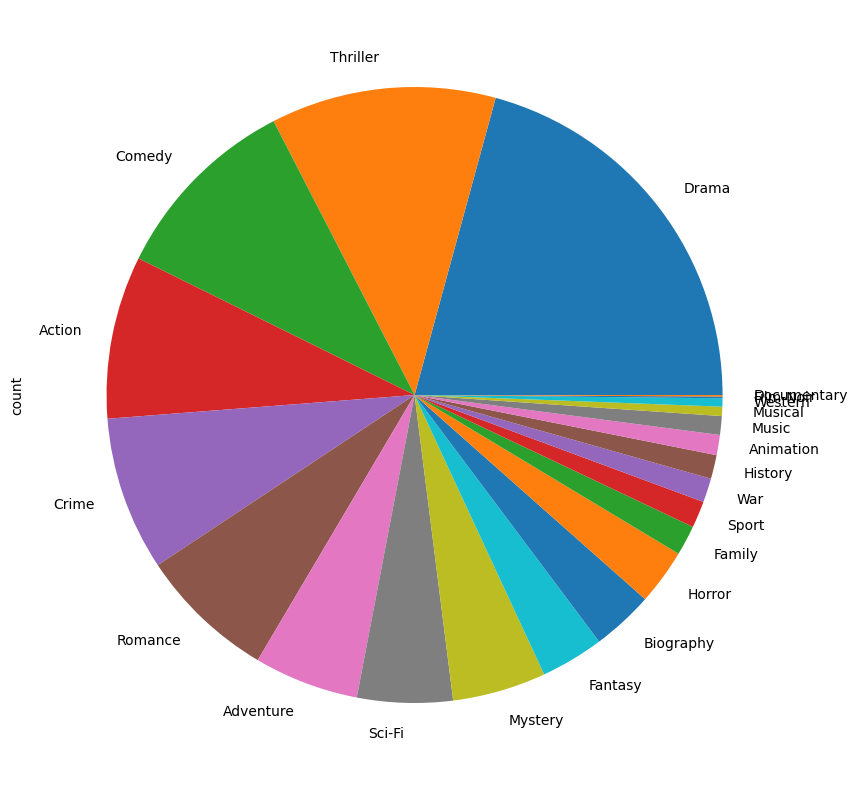

In [76]:
title_script_metagenres_metascore_df['meta_genres'].explode().value_counts().plot.pie(figsize=(10,10), fontsize=10)

In [79]:
title_script_metagenres_metascore_df['meta_score'] = pd.to_numeric(title_script_metagenres_metascore_df['meta_score'])


In [23]:
genre_aq_dict = {
    "Horror": "Terrifying",
    "Action": "Exhilarating",
    "Adventure": "Epic",
    "Family": "Heartwarming",
    "Documentary": "Enlightening",
    "History": "Authentic",
    "War": "Gritty",
    "Biography": "Inspirational",
    "Music": "Rhythmic",
    "Musical": "Show-stopping",
    "Sport": "Competitive",
    "Animation": "Imaginative",
    "Film-Noir": "Moody",
    "Science Fiction": "Futuristic",
    "Crime": "Suspenseful",
    "Comedy": "Hilarious",
    "Western": "Rugged",
    "Fantasy": "Magical",
    "Thriller": "Gripping",
    "Mystery": "Intriguing",
    "Drama": "Poignant",
    "Romance": "Passionate"
}

In [43]:
list(genre_aq_dict.keys())

['Horror',
 'Action',
 'Adventure',
 'Family',
 'Documentary',
 'History',
 'War',
 'Biography',
 'Music',
 'Musical',
 'Sport',
 'Animation',
 'Film-Noir',
 'Science Fiction',
 'Crime',
 'Comedy',
 'Western',
 'Fantasy',
 'Thriller',
 'Mystery',
 'Drama',
 'Romance']

In [102]:
for genre, aq in genre_aq_dict.items():
    genre_df = title_script_metagenres_metascore_df[title_script_metagenres_metascore_df.meta_genres.apply(lambda x: genre in x)]
    print(genre, aq, genre_df.groupby('title').mean(numeric_only=True)[['meta_score', aq]].corr().iloc[0].iloc[1])

Horror Terrifying -0.07110509476299424
Action Exhilarating -0.06241015894581193
Adventure Epic 0.00797726802375848
Family Heartwarming -0.25427891777062406
Documentary Enlightening -1.0
History Authentic 0.34449252654640633
War Gritty -0.10245714042498907
Biography Inspirational -0.1015846852258624
Music Rhythmic -0.28960347815836207
Musical Show-stopping 0.07123462256906479
Sport Competitive -0.19125391760081298
Animation Imaginative 0.1408371835836054
Film-Noir Moody -1.0
Science Fiction Futuristic nan
Crime Suspenseful -0.22053526433683687
Comedy Hilarious -0.18602925579284973
Western Rugged -0.42518963115820474
Fantasy Magical -0.0869090491612775
Thriller Gripping -0.21062207556107362
Mystery Intriguing -0.30900180879015315
Drama Poignant -0.0641922737618053
Romance Passionate -0.16181332463101217


In [61]:
stats.mannwhitneyu(romance_df['Hilarious'], comedy_df['Hilarious'], alternative='less')

MannwhitneyuResult(statistic=18631339895.5, pvalue=5.67835150813018e-255)

In [68]:
stats.mannwhitneyu(comedy_df['Passionate'], romance_df['Passionate'], alternative='less')

MannwhitneyuResult(statistic=19787670920.5, pvalue=0.0013011514043996945)

In [103]:
history_df = title_script_metagenres_metascore_df[title_script_metagenres_metascore_df.meta_genres.apply(lambda x: 'History' in x)]

In [122]:
comedy_df = title_script_metagenres_metascore_df[title_script_metagenres_metascore_df.meta_genres.apply(lambda x: 'Comedy' in x)]

In [126]:
drama_df = title_script_metagenres_metascore_df[title_script_metagenres_metascore_df.meta_genres.apply(lambda x: 'Drama' in x)]

In [127]:
no_drama_df = title_script_metagenres_metascore_df[title_script_metagenres_metascore_df.meta_genres.apply(lambda x: 'Drama' not in x)]

In [124]:
stats.mannwhitneyu(history_df['Hilarious'], comedy_df['Hilarious'], alternative='less')

MannwhitneyuResult(statistic=10496923254.5, pvalue=6.618256077102064e-80)

In [125]:
stats.mannwhitneyu(comedy_df['Authentic'], history_df['Authentic'], alternative='less')

MannwhitneyuResult(statistic=9679584103.5, pvalue=0.0)

In [128]:
stats.mannwhitneyu(no_drama_df['Poignant'], drama_df['Poignant'], alternative='less')

MannwhitneyuResult(statistic=204372064522.0, pvalue=4.699438256784766e-274)